In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
data = pd.read_csv (r'data/SFARI-Genes.csv')
cols = data.columns
N, D = data.shape
print(cols)

Index(['status', 'gene-symbol', 'gene-name', 'ensembl-id', 'chromosome',
       'genetic-category', 'gene-score', 'syndromic', 'number-of-reports'],
      dtype='object')


# task 1

Text(0.5, 1.0, 'A bar chart to show the number of genes in each\nSFARI gene-score category')

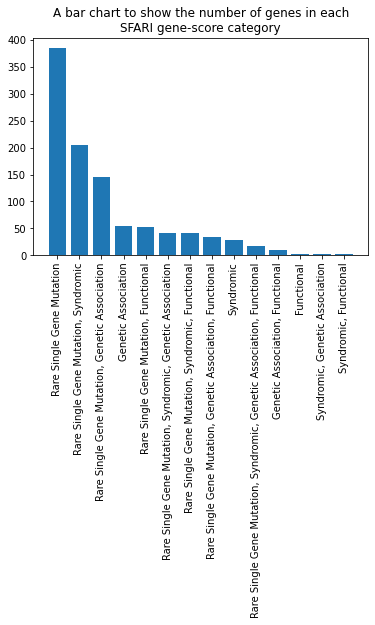

In [3]:
gene_cats_data = data['genetic-category']
gene_cat_counts = gene_cats_data.value_counts()
gene_cat_vals = gene_cat_counts.index

A, B = gene_cat_vals.size, gene_cat_counts.size
assert(A == B)

plt.bar(gene_cat_vals, gene_cat_counts)
plt.xticks(rotation=90)
plt.title("A bar chart to show the number of genes in each\nSFARI gene-score category")

# task 2

In [4]:
ranked_data = data.sort_values("number-of-reports")
indexes = ranked_data.index[ranked_data['gene-score'] == 1].tolist()
gene_scores = ranked_data['gene-score']
num_reports = ranked_data["number-of-reports"]

display(ranked_data)

,status,gene-symbol,gene-name,ensembl-id,chromosome,genetic-category,gene-score,syndromic,number-of-reports
511,9,KNG1,kininogen 1,ENSG00000113889,3,Rare Single Gene Mutation,3.0,0,1
574,9,MNT,MAX network transcriptional repressor,ENSG00000070444,17,Genetic Association,3.0,0,1
923,9,TFB2M,"transcription factor B2, mitochondrial",ENSG00000162851,1,Rare Single Gene Mutation,3.0,0,1
562,9,NEO1,Neogenin 1,ENSG00000067141,15,NaN,3.0,0,1
925,9,TMEM134,transmembrane protein 134,ENSG00000172663,11,Rare Single Gene Mutation,3.0,0,1
...,...,...,...,...,...,...,...,...,...
184,9,CNTNAP2,contactin associated protein-like 2,ENSG00000174469,7,"Rare Single Gene Mutation, Syndromic, Genetic ...",2.0,1,71
789,9,SCN2A,"sodium channel, voltage-gated, type II, alpha ...",ENSG00000136531,2,"Rare Single Gene Mutation, Syndromic",1.0,0,75
510,9,MECP2,Methyl CpG binding protein 2,ENSG00000169057,X,"Rare Single Gene Mutation, Syndromic, Functional",1.0,1,90
812,9,SHANK3,SH3 and multiple ankyrin repeat domains 3,ENSG00000251322,22,"Rare Single Gene Mutation, Syndromic, Genetic ...",1.0,1,92


In [5]:
indexes[-5:]

[780, 789, 510, 812, 596]

In [6]:
for i in indexes[-5:]:
    print(i)
    print(data.iloc[i]["number-of-reports"])
    print()

780
status                                                               9
gene-symbol                                                      SCN1A
gene-name            sodium channel, voltage-gated, type I, alpha s...
ensembl-id                                             ENSG00000144285
chromosome                                                           2
genetic-category     Rare Single Gene Mutation, Syndromic, Genetic ...
gene-score                                                         1.0
syndromic                                                            1
number-of-reports                                                   68
Name: 780, dtype: object

789
status                                                               9
gene-symbol                                                      SCN2A
gene-name            sodium channel, voltage-gated, type II, alpha ...
ensembl-id                                             ENSG00000136531
chromosome                                 

# task 3

# task 4

In [7]:
genes = ["NRXN1", "SHANK3", "MECP2", "SCN2A", "SCN1A"]
files = ["nrxn1", "shank3", "mecp2", "scn2a", "scn1a"]

In [8]:
years = np.concatenate(([1993], np.arange(1999,2022, 1)))
year_data = np.zeros((5, years.size))


for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data_f = gene_data["Publication Year"].value_counts().sort_index()
    
    for y in range(years.size):
        year = years[y]
        
        if year in year_data_f.index:
            year_data[f, y] = year_data_f[year]

In [58]:
year_data2 = []

for f in range(5):
    file = files[f]
    
    gene_data = pd.read_csv(os.getcwd() + "/data/task1-4/" + file + ".csv")
    year_data2.append(gene_data["Publication Year"].values.tolist())

0      2017
1      2019
2      1993
3      2017
4      2016
       ... 
415    2017
416    2013
417    2021
418    2016
419    2010
Name: Publication Year, Length: 420, dtype: int64

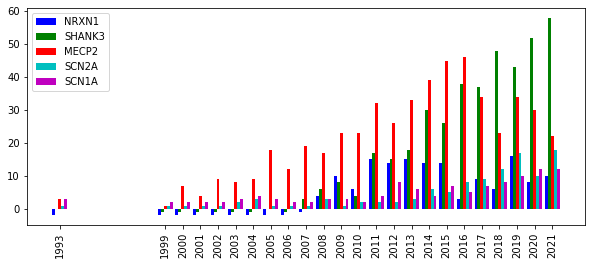

In [35]:
ax = plt.subplot()

width = 1
offsets = [-width*2, -width, 0, width, width*2]
colours = ["b", "g", "r", "c", "m"]
new_years = years*6
labels = np.char.mod("%d", years)

for f in range(5):
    ax.bar(new_years + offsets[f], year_data[f, :] + offsets[f], width=width, color=colours[f], align="center", label=genes[f])
    #print(new_years + offsets[f])
    
ax.set_xticks(new_years)
ax.set_xticklabels(labels, rotation=90)
#ax.figure.set_figheight(8)
ax.figure.set_figwidth(10)
ax.legend()

([<matplotlib.axis.XTick at 0x7f936f0ca3a0>,
 [Text(1993.5, 0, '1993'),
  Text(1999.5, 0, '1999'),
  Text(2000.5, 0, '2000'),
  Text(2001.5, 0, '2001'),
  Text(2002.5, 0, '2002'),
  Text(2003.5, 0, '2003'),
  Text(2004.5, 0, '2004'),
  Text(2005.5, 0, '2005'),
  Text(2006.5, 0, '2006'),
  Text(2007.5, 0, '2007'),
  Text(2008.5, 0, '2008'),
  Text(2009.5, 0, '2009'),
  Text(2010.5, 0, '2010'),
  Text(2011.5, 0, '2011'),
  Text(2012.5, 0, '2012'),
  Text(2013.5, 0, '2013'),
  Text(2014.5, 0, '2014'),
  Text(2015.5, 0, '2015'),
  Text(2016.5, 0, '2016'),
  Text(2017.5, 0, '2017'),
  Text(2018.5, 0, '2018'),
  Text(2019.5, 0, '2019'),
  Text(2020.5, 0, '2020'),
  Text(2021.5, 0, '2021')])

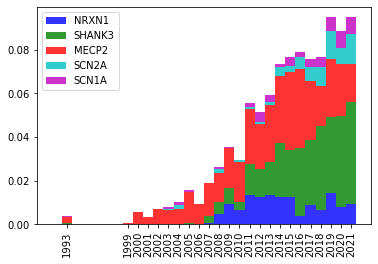

In [95]:
n_bins = years.size
#fcs = [(1,0,0,0.5), (0,1,0,0.5), (0,0,1,0.5), (0.5,0.5,0,0.5), (0.5,0,0.5,0.5)]

plt.hist(year_data2, range(1992,2023), density=1, histtype="bar", stacked=True,color=colours, alpha=0.8, label=genes)
plt.legend()
plt.xticks(years+0.5, years, rotation=90)

# task 5

In [89]:
for i in range(5):
    print(len(year_data2[i]))

173
420
517
87
68
